In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
! ls -s /content/gdrive/MyDrive/carVtruck.zip

79566 /content/gdrive/MyDrive/carVtruck.zip


In [ ]:
!unzip "/content/gdrive/MyDrive/carVtruck.zip" -d "/content/gdrive/MyDrive/PML"

Archive:  /content/gdrive/MyDrive/carVtruck.zip
replace /content/gdrive/MyDrive/PML/train/Car/00002.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
! ls

gdrive	sample_data


In [ ]:
import os
import numpy as np
import pandas as pd
import torch
import matplotlib as plt
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
# Define paths
train_car_path = "/content/gdrive/MyDrive/PML/train/Car"
train_truck_path = "/content/gdrive/MyDrive/PML/train/Truck"

In [ ]:
# Define Df for trucks and cars

truck_df = pd.DataFrame(columns=['Image', 'Path'])
car_df = pd.DataFrame(columns=['Image', 'Path'])

In [ ]:
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = preprocess_input(img)
    return img

In [ ]:
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(120, 120))
    img = img_to_array(img)
    img = preprocess_input(img)
    return img

In [ ]:
truck_images_folder = "/content/gdrive/MyDrive/PML/train/Truck"
for image_file in os.listdir(truck_images_folder):
    image_path = os.path.join(truck_images_folder, image_file)
    img_data = load_and_preprocess_image(image_path)
    truck_df = truck_df.append({'Image': img_data, 'Path': image_path}, ignore_index=True)

car_images_folder = "/content/gdrive/MyDrive/PML/train/Car"
for image_file in os.listdir(car_images_folder):
    image_path = os.path.join(car_images_folder, image_file)
    img_data = load_and_preprocess_image(image_path)
    car_df = truck_df.append({'Image': img_data, 'Path': image_path}, ignore_index=True)


Streaming output truncated to the last 5000 lines.
<ipython-input-10-7ecc2523c053>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  car_df = truck_df.append({'Image': img_data, 'Path': image_path}, ignore_index=True)
<ipython-input-10-7ecc2523c053>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  car_df = truck_df.append({'Image': img_data, 'Path': image_path}, ignore_index=True)
<ipython-input-10-7ecc2523c053>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  car_df = truck_df.append({'Image': img_data, 'Path': image_path}, ignore_index=True)
<ipython-input-10-7ecc2523c053>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  car_df = t

In [ ]:
truck_df

,Image,Path
0,"[[[-103.939, -116.779, -123.68], [-103.939, -1...",/content/gdrive/MyDrive/PML/train/Truck/04365....
1,"[[[-103.939, -116.779, -123.68], [-103.939, -1...",/content/gdrive/MyDrive/PML/train/Truck/04454....
2,"[[[38.060997, 33.221, 39.32], [38.060997, 33.2...",/content/gdrive/MyDrive/PML/train/Truck/04001....
3,"[[[-103.939, -116.779, -123.68], [-103.939, -1...",/content/gdrive/MyDrive/PML/train/Truck/05030....
4,"[[[-103.939, -116.779, -123.68], [-103.939, -1...",/content/gdrive/MyDrive/PML/train/Truck/02389....
...,...,...
2151,"[[[-103.939, -116.779, -123.68], [-103.939, -1...",/content/gdrive/MyDrive/PML/train/Truck/00088....
2152,"[[[-103.939, -116.779, -123.68], [-103.939, -1...",/content/gdrive/MyDrive/PML/train/Truck/00692....
2153,"[[[-103.939, -115.779, -123.68], [-101.939, -1...",/content/gdrive/MyDrive/PML/train/Truck/00906....
2154,"[[[-103.939, -116.779, -123.68], [-103.939, -1...",/content/gdrive/MyDrive/PML/train/Truck/00952....


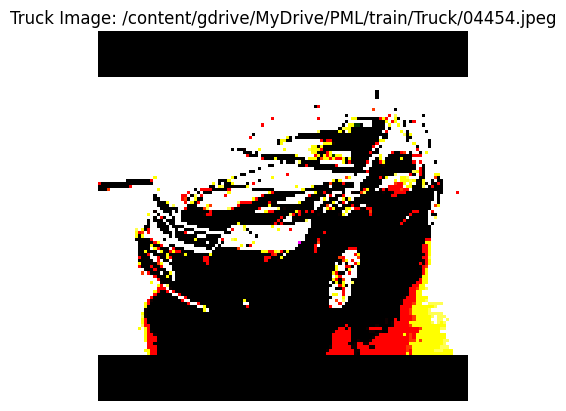

In [ ]:
chosen_image_index = 1
chosen_image = truck_df.loc[chosen_image_index, 'Image']
chosen_image_path = truck_df.loc[chosen_image_index, 'Path']

plt.imshow(chosen_image)
plt.title(f"Truck Image: {chosen_image_path}")
plt.axis('off')  # Turn off axes
plt.show()

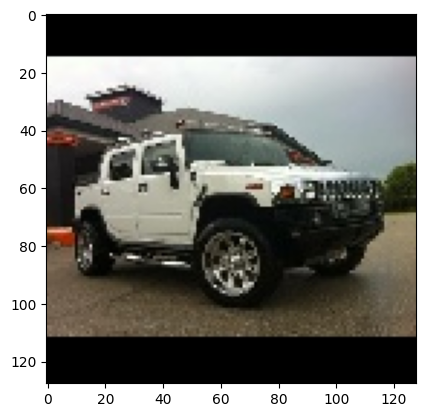

In [ ]:
image = Image.open("/content/gdrive/MyDrive/PML/train/Truck/00001.jpeg")
plt.imshow(image)

new

In [ ]:
def load_and_preprocess_images(image_folder):
    images = []
    for image_file in os.listdir(image_folder):
        img = load_img(os.path.join(image_folder, image_file), target_size=(224, 224))
        img = img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
    return images


In [ ]:
train_car_images = load_and_preprocess_images(train_car_path)
train_truck_images = load_and_preprocess_images(train_truck_path)


In [ ]:
train_car_images

[array([[[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-101.939, -116.779, -123.68 ],
         [-101.939, -116.779, -123.68 ],
         [-101.939, -116.779, -123.68 ]],
 
        [[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-101.939, -116.779, -123.68 ],
         [-101.939, -116.779, -123.68 ],
         [-101.939, -116.779, -123.68 ]],
 
        [[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-101.939, -116.779, -123.68 ],
         [-101.939, -116.779, -123.68 ],
         [-101.939, -116.779, -123.68 ]],
 
        ...,
 
        [[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939

In [ ]:
# Combine images and calculate features
all_images = np.vstack((train_car_images, train_truck_images))

# Calculate pairwise distances
distances = pairwise_distances(all_images.reshape(len(all_images), -1), metric="euclidean")

# Agglomerative Clustering
num_clusters = 2  # Number of clusters (cars and trucks)
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, affinity='precomputed', linkage='average')
cluster_labels = agg_clustering.fit_predict(distances)

# Print cluster labels
print("Cluster labels:", cluster_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster labels: [1 1 1 ... 1 1 1]


<ipython-input-17-48010eaf20e3>:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distances, method='average')


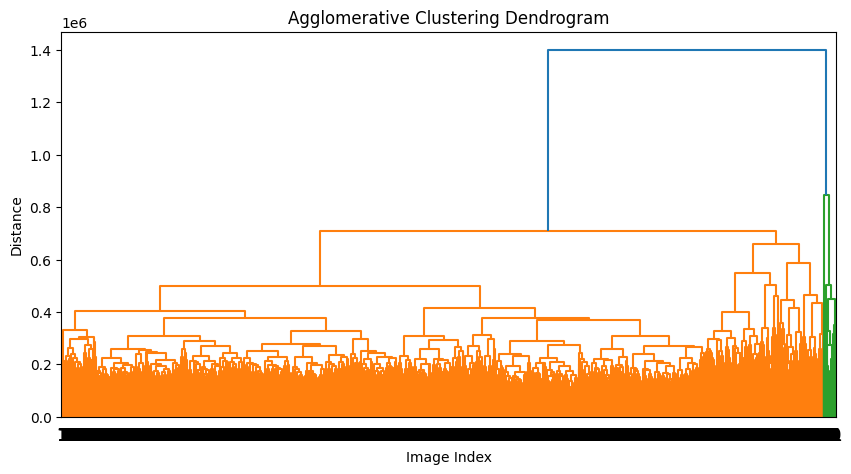

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage


linkage_matrix = linkage(distances, method='average')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=cluster_labels, leaf_rotation=0, leaf_font_size=12)
plt.xlabel('Image Index')
plt.ylabel('Distance')
plt.title('Agglomerative Clustering Dendrogram')
plt.show()

Changed the metrics

In [ ]:
# Combine images and calculate features
all_images = np.vstack((train_car_images, train_truck_images))

# Calculate pairwise distances
distances = pairwise_distances(all_images.reshape(len(all_images), -1), metric="manhattan")

# Agglomerative Clustering
num_clusters = 2  # Number of clusters (cars and trucks)
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, affinity='precomputed', linkage='average')
cluster_labels = agg_clustering.fit_predict(distances)

# Print cluster labels
print("Cluster labels:", cluster_labels)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage


linkage_matrix = linkage(distances, method='manhattan')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=cluster_labels, leaf_rotation=0, leaf_font_size=12)
plt.xlabel('Image Index')
plt.ylabel('Distance')
plt.title('Agglomerative Clustering Dendrogram')
plt.show()

Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.1)  # Adjust contamination based on your dataset
clf.fit(all_images.reshape(len(all_images), -1))

# Predict anomaly scores
anomaly_scores = clf.score_samples(all_images.reshape(len(all_images), -1))

# Set anomaly threshold
anomaly_threshold = -0.5  # Adjust threshold based on your dataset and contamination

# Categorize images
categorized_images = ["Car" if score > anomaly_threshold else "Truck" for score in anomaly_scores]
print("Categorized images:", categorized_images)

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    image = all_images[i]
    plt.imshow(image)
    plt.axis('off')

plt.show()

In [ ]:
# Predict anomaly scores
anomaly_scores = clf.score_samples(all_images.reshape(len(all_images), -1))

# Plot histogram of anomaly scores
plt.hist(anomaly_scores, bins=50, density=True, alpha=0.7)
plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.title('Anomaly Score Histogram')
plt.show()

tetst2

In [ ]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.5)  # Adjust contamination based on your dataset
clf.fit(all_images.reshape(len(all_images), -1))

# Predict anomaly scores
anomaly_scores = clf.score_samples(all_images.reshape(len(all_images), -1))

# Set anomaly threshold
anomaly_threshold = -0.5  # Adjust threshold based on your dataset and contamination

# Categorize images
categorized_images = ["Car" if score > anomaly_threshold else "Truck" for score in anomaly_scores]
print("Categorized images:", categorized_images)

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    image = all_images[i]
    plt.imshow(image)
    plt.axis('off')

plt.show()